# SciPy
SciPy is a collection of mathematical algorithms and convenience functions. In this this notebook there are just a few examples of the features that are most important to us. But if you want to see all that SciPy has to offer, have a look at the [official documentation](https://docs.scipy.org/doc/scipy/reference/).

Since SciPy has several sublibraries, it is commom practice to import just the one we are going to use, as you'll in the following examples.

In [2]:
import numpy as np
import matplotlib as mpl  # ignore this for now
import matplotlib.pyplot as plt  # ignore this for now

# Interpolation
There are several general interpolation facilities available in SciPy, for data in 1, 2, and higher dimensions. First, let's generate some sample data.

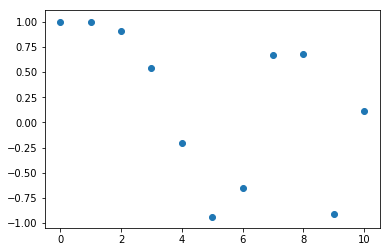

In [5]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

plt.scatter(x,y)

The `interp1d` funtions grabs data points and **returns a *function***. The default interpolation method is the linear interpolation, but there are several to choose from.

In [6]:
from scipy.interpolate import interp1d

f1 = interp1d(x, y)  # linear is the default
f2 = interp1d(x, y, kind='cubic')  # cubic splines
f3 = interp1d(x, y, kind='nearest')  # grab the nearest value
f4 = interp1d(x, y, kind='previous')  # hold last value
f5 = interp1d(x, y, kind='next')  # grab the next value

In [17]:
print(f1(4))
print(f2(4))

print(f1(4.6))
print(f2(4.6))

-0.2055067203681578
-0.20550672036815779
-0.6429303687338919
-0.7069342200967287


Now that we have the interpolated function, lets generate a tighter grid in the x axis and plot the resulto of the different interpolation methods.

In [12]:
xnew = np.linspace(0, 10, num=101, endpoint=True)
xnew

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

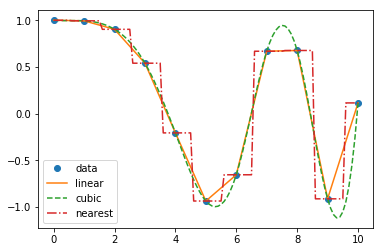

In [13]:
plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '-.')
plt.legend(['data', 'linear', 'cubic', 'nearest'], loc='best')
plt.show()

The `interpolate` sublibrary also has interpolation methods for multivariate data and has **integration with pandas**. Have a look at the documentation.

# Definite Integrals
The function `quad` is provided to integrate a function of one variable between two points. This functions has 2 outputs, the first one is the computed integral value and the second is an estimate of the absolute error.

In [18]:
import scipy.integrate as integrate

def my_func(x):
    return x**2

integrate.quad(my_func, 0, 2)

(2.666666666666667, 2.960594732333751e-14)

The `quad` functions also allows for infinite limits.

$$
\int_{-\infty}^{\infty} e^{-x^{2}}dx
$$

In [19]:
def my_func(x):
    return np.exp(-x**2)

integrate.quad(my_func, -np.inf, np.inf)

(1.7724538509055159, 1.4202636781830878e-08)

SciPy's `integrate` library also has functions for double and triple integrals. Check them out in the documentations.

# Optimization
The `scipy.optimize` package provides several commonly used optimization algorithms. Here we are going to use just one to illustrate.

Consider that you have 3 assets available. Their expected returns, risks (standard-deviations) and betas are on the table bellow and $\rho$ is the correlation matrix of the returns.

| Asset | Return | Risk | Beta |
|-------|--------|------|------|
|A      |3%      | 10%  | 0.5  |
|B      |3.5%    | 11%  | 1.2  |
|C      |5%      | 15%  | 1.8  |

$$
\rho = 
\begin{bmatrix}
1 & 0.3 & -0.6 \\
0.3 & 1 & 0 \\
-0.6 & 0 & 1 
\end{bmatrix}
$$

Use the `minimize` function to find the weights of each asset that maximizes it's Sharpe index.

In [22]:
retu = np.array([0.03, 0.035, 0.05])
risk = np.array([0.10, 0.11, 0.15])
beta = np.array([0.5, 1.2, 1.8])

corr = np.array([[1, 0.3, -0.6], 
                 [0.3, 1, 0],
                 [-0.6, 0, 1]])

def port_return(w):
    return retu.dot(w)

def port_risk(w):
    covar = np.diag(risk).dot(corr).dot(np.diag(risk))
    return (w.dot(covar).dot(w))**0.5

def port_sharpe(w):
    return -1*(port_return(w) / port_risk(w))   # The -1 is because we want to MINIMIZE the negative of the Sharpe

def port_weight(w):
    return w.sum()

When declaring an optimization problem with inequality restrictions, they have the form of:

$$
\begin{align*}
\min_{w} & f\left(w\right)\\
s.t. & g\left(w\right)\geq0
\end{align*}
$$

In [23]:
from scipy.optimize import minimize

eq_cons = {'type': 'eq',
           'fun' : lambda w: port_weight(w) - 1}

w0 = np.array([1, 0, 0])

res = minimize(port_sharpe, w0, method='SLSQP', constraints=eq_cons, options={'ftol': 1e-9, 'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.7140791324512301
            Iterations: 7
            Function evaluations: 37
            Gradient evaluations: 7


In [24]:
res.x

array([0.54864871, 0.06613309, 0.3852182 ])

In [25]:
res.x.sum()

1.0

In [26]:
-1*res.fun

0.7140791324512301

# Linear Algebra (again)
`scipy.linalg` contains all the functions in `numpy.linalg` plus some more advanced ones.

In [27]:
from scipy import linalg as la

A = np.array([[1,3,5],[2,5,1],[2,3,8]])
la.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

Matrix and vector **norms** can also be computed with SciPy. A wide range of norm definitions are available using different parameters to the order argument of `linalg.norm`.

In [28]:
A = np.array([[1, 2], [3, 4]])
print(la.norm(A))  # frobenius norm is the default.
print(la.norm(A, 1)) # L1 norm (max column sum)
print(la.norm(A, np.inf)) # L inf norm (max row sum)

5.477225575051661
6.0
7.0


Some more advanced matrix decompositions are also available, like the **Schur Decomposition**

In [29]:
la.schur(A)

(array([[-0.37228132, -1.        ],
        [ 0.        ,  5.37228132]]), array([[-0.82456484, -0.56576746],
        [ 0.56576746, -0.82456484]]))

Some notable matrices can also be created, like block **diagonal matrices**.

In [30]:
A = np.array([[1, 0],
              [0, 1]])

B = np.array([[3, 4, 5],
              [6, 7, 8]])

C = np.array([[7]])

la.block_diag(A, B, C)

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 3, 4, 5, 0],
       [0, 0, 6, 7, 8, 0],
       [0, 0, 0, 0, 0, 7]], dtype=int32)

# Solving Linear Systems


$$
\begin{align}
x+3y+5 & =10\\
2x+5y+z & =8\\
2x+3y+8z & =3
\end{align}
$$

The system above can be written with matrix notation as $AX=B$ and we know we can find the solution by doing $X=A^{-1}B$, but inverting a matrix is computationally expensive. When solving big linear system it is advised to use the `solve` method.

In [31]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
B = np.array([[10], [8], [3]])

Lets check the time that it takes to solve the system in both ways...

In [32]:
la.inv(A).dot(B)

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [33]:
la.solve(A, B)

array([[-9.28],
       [ 5.16],
       [ 0.76]])

let's try with a bigger matrix

In [40]:
import numpy.random as rnd
A = rnd.random((1000, 1000))
B = rnd.random((1000, 1))

In [43]:
%%timeit
la.inv(A).dot(B)

23.9 ms ± 699 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
%%timeit
la.solve(A, B)

21.9 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
